In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import os
os.environ['R_HOME']='/home/tguo/tguo2/miniconda3/envs/pyg/lib/R'
import sys
from sklearn.metrics.cluster import adjusted_rand_score
import anndata
import scipy as sp
import scipy.sparse
import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import euclidean_distances
from utils import *
methods=['spiral','harmony_SEDR','harmony_STAGATE','seurat','harmony','DeepST','STAligner','GraphST']

In [2]:
def refine_clust(sample_id, pred, dis, num_nbs=8):
    refined_pred=[]
    pred=pd.DataFrame({"pred": pred}, index=sample_id)
    dis_df=pd.DataFrame(dis, index=sample_id, columns=sample_id)
    for i in range(len(sample_id)):
        index=sample_id[i]
        dis_tmp=dis_df.loc[index, :].sort_values()
        nbs=dis_tmp[0:num_nbs+1]
        nbs_pred=pred.loc[nbs.index, "pred"]
        self_pred=pred.loc[index, "pred"]
        v_c=nbs_pred.value_counts()
        if (v_c.loc[self_pred]<(num_nbs+1)/2) and (np.max(v_c)>(num_nbs+1)/2):
            refined_pred.append(v_c.idxmax())
        else:           
            refined_pred.append(self_pred)
    return refined_pred

def multiple_refine(adata,method,metric='louvain',NUM_NBS=6):
    ub=np.unique(adata.obs.loc[:,'batch'])
    clust_refined=pd.DataFrame(0,index=['a'],columns=['refine_clust'])
    adata.obs[method+'_'+metric+'_refine']=0
    for i in np.arange(len(ub)):
        idx=np.where(adata.obs.loc[:,'batch']==ub[i])[0]
        sample_id=adata.obs_names[idx]
        coord=adata.obsm['spatial'][idx,:]
        coord=pd.DataFrame(coord,index=sample_id,columns=['x','y'])
        clust_orig1=adata.obs.loc[sample_id,method+'_'+metric]
        dis=euclidean_distances(coord,coord)
        a=refine_clust(sample_id, np.array(clust_orig1), dis, num_nbs=NUM_NBS)
        adata.obs.loc[sample_id,method+'_'+metric+'_refine']=a
    return adata

In [214]:
# dirs="/data02/tguo/space_batch_effect/simulate/"
# batch_sim="_1_2"
# types="_3batch_types5"
# flags=batch_sim+types
# feat=pd.read_csv(dirs+"gtt_input/feat1"+flags+".csv",header=0,index_col=0,sep=',')
# meta=pd.read_csv(dirs+"gtt_input/meta1"+flags+".csv",header=0,index_col=0,sep=',')
# coord=pd.read_csv(dirs+"gtt_input/coord1"+flags+".csv",header=0,index_col=0,sep=',')
# B=3
# for i in np.arange(1,B):
#     feat=pd.concat((feat,pd.read_csv(dirs+"gtt_input/feat"+str(i+1)+flags+".csv",header=0,index_col=0,sep=',')))
#     meta=pd.concat((meta,pd.read_csv(dirs+"gtt_input/meta"+str(i+1)+flags+".csv",header=0,index_col=0,sep=',')))
#     coord=pd.concat((coord,pd.read_csv(dirs+"gtt_input/coord"+str(i+1)+flags+".csv",header=0,index_col=0,sep=',')))
# adata = sc.AnnData(feat)
# adata.var_names_make_unique()
# coord = coord.loc[adata.obs_names, ['x', 'y']]
# adata.obsm["spatial"] = coord.to_numpy()
# adata.X=scipy.sparse.csr_matrix(adata.X)
# adata.obs= meta.loc[adata.obs_names, :]
# adata.obs['batch']=np.array(adata.obs['batch'],dtype=str)

In [2]:
# dirs="/data02/tguo/space_batch_effect/Hippo/"
# sample_name=["10X_Normal","10X_DAPI","10X_FFPE"]
# IDX=np.array([0,1,2])
# i=IDX[0]
# feat=pd.read_csv(dirs+"gtt_input/"+str(sample_name[i])+"_mat.csv",header=0,index_col=0,sep=',')
# meta=pd.read_csv(dirs+"gtt_input/"+str(sample_name[i])+"_meta.csv",header=0,index_col=0,sep=',')
# coord=pd.read_csv(dirs+"gtt_input/"+str(sample_name[i])+"_coord.csv",header=0,index_col=0,sep=',')
# flags='_'+str(sample_name[i])
# for sample in np.array(sample_name)[IDX[1:len(IDX)]]:
#     feat=pd.concat((feat,pd.read_csv(dirs+"gtt_input/"+str(sample)+"_mat.csv",header=0,index_col=0,sep=',')))
#     meta=pd.concat((meta,pd.read_csv(dirs+"gtt_input/"+str(sample)+"_meta.csv",header=0,index_col=0,sep=',')))
#     coord=pd.concat((coord,pd.read_csv(dirs+"gtt_input/"+str(sample)+"_coord.csv",header=0,index_col=0,sep=',')))
#     flags=flags+'_'+str(sample)
# adata = sc.AnnData(feat)
# adata.var_names_make_unique()
# coord = coord.loc[adata.obs_names, ['x', 'y']]
# adata.obsm["spatial"] = coord.to_numpy()
# adata.X=scipy.sparse.csr_matrix(adata.X)
# adata.obs= meta.loc[adata.obs_names, :]   
# adata.obs['batch']=np.array(adata.obs['batch'],dtype=str)
# NUM_NBS=6

In [17]:
# dirs="/data02/tguo/space_batch_effect/mouse_brain/"
# sample_name=["all_posterior1","all_posterior2","all_anterior1","all_anterior2"]
# # sample_name=["posterior1","posterior2"]
# # sample_name=["anterior1","anterior2"]
# IDX=np.array([0,1,2,3])
# i=IDX[0]
# feat=pd.read_csv(dirs+"gtt_input/"+str(sample_name[i])+"_mat.csv",header=0,index_col=0,sep=',')
# meta=pd.read_csv(dirs+"gtt_input/"+str(sample_name[i])+"_meta.csv",header=0,index_col=0,sep=',')
# coord=pd.read_csv(dirs+"gtt_input/"+str(sample_name[i])+"_coord.csv",header=0,index_col=0,sep=',')
# flags='_'+str(sample_name[i])
# for sample in np.array(sample_name)[IDX[1:len(IDX)]]:
#     feat=pd.concat((feat,pd.read_csv(dirs+"gtt_input/"+str(sample)+"_mat.csv",header=0,index_col=0,sep=',')))
#     meta=pd.concat((meta,pd.read_csv(dirs+"gtt_input/"+str(sample)+"_meta.csv",header=0,index_col=0,sep=',')))
#     coord=pd.concat((coord,pd.read_csv(dirs+"gtt_input/"+str(sample)+"_coord.csv",header=0,index_col=0,sep=',')))
#     flags=flags+'_'+str(sample)
# adata = sc.AnnData(feat)
# adata.var_names_make_unique()
# coord = coord.loc[adata.obs_names, ['x', 'y']]
# adata.obsm["spatial"] = coord.to_numpy()
# adata.X=scipy.sparse.csr_matrix(adata.X)
# adata.obs= meta.loc[adata.obs_names, :]   
# adata.obs['batch']=np.array(adata.obs['batch'],dtype=str)
# NUM_NBS=6

In [6]:
dirs="/data02/tguo/space_batch_effect/mouse_OB/"
# sample_name=["BGI","SlideV2"]
# extra_dirs="BGI_SlideV2_10X/"
sample_name=["Stereo-v2","SlideV2-v2"]
extra_dirs="Stereo-seq-higher-resolution/"
IDX=np.array([0,1])
i=IDX[0]
feat=pd.read_csv(dirs+"gtt_input/"+extra_dirs+str(sample_name[i])+"_mat.csv",header=0,index_col=0,sep=',')
meta=pd.read_csv(dirs+"gtt_input/"+extra_dirs+str(sample_name[i])+"_meta.csv",header=0,index_col=0,sep=',')
meta=meta.loc[:,'batch']
coord=pd.read_csv(dirs+"gtt_input/"+extra_dirs+str(sample_name[i])+"_coord.csv",header=0,index_col=0,sep=',')
flags='_'+str(sample_name[i])
for sample in np.array(sample_name)[IDX[1:len(IDX)]]:
    feat1=pd.read_csv(dirs+"gtt_input/"+extra_dirs+str(sample)+"_mat.csv",header=0,index_col=0,sep=',')
    meta1=pd.read_csv(dirs+"gtt_input/"+extra_dirs+str(sample)+"_meta.csv",header=0,index_col=0,sep=',')
    meta1=meta1.loc[:,'batch']
    coord1=pd.read_csv(dirs+"gtt_input/"+extra_dirs+str(sample)+"_coord.csv",header=0,index_col=0,sep=',')
    if sample=="SlideV2":
        used_barcodes=np.loadtxt(dirs+"origin/used_barcodes.txt",dtype=str)
        used_barcodes=['SlideV2-'+x for x in used_barcodes]
        cells=np.intersect1d(used_barcodes,feat1.index)
        feat1=feat1.loc[cells,:]
        meta1=meta1.loc[cells,:]
        coord1=coord1.loc[cells,:]
    feat=pd.concat((feat,feat1))
    meta=pd.concat((meta,meta1))
    coord=pd.concat((coord,coord1))
    flags=flags+'_'+str(sample)
meta=pd.DataFrame(meta)
adata = sc.AnnData(feat)
adata.var_names_make_unique()
coord = coord.loc[adata.obs_names, ['x', 'y']]
adata.obsm["spatial"] = coord.to_numpy()
adata.X=scipy.sparse.csr_matrix(adata.X)
adata.obs= meta.loc[adata.obs_names, :]   
adata.obs['batch']=np.array(adata.obs['batch'],dtype=str)
NUM_NBS=8


In [3]:
# dirs="/data02/tguo/space_batch_effect/mouse_OB/"
# 
# IDX=np.array([0,1])
# i=IDX[0]
# feat=pd.read_csv(dirs+"gtt_input/"+str(sample_name[i])+"_mat.csv",header=0,index_col=0,sep=',')
# meta=pd.read_csv(dirs+"gtt_input/"+str(sample_name[i])+"_meta.csv",header=0,index_col=0,sep=',')
# coord=pd.read_csv(dirs+"gtt_input/"+str(sample_name[i])+"_coord.csv",header=0,index_col=0,sep=',')
# flags='_'+str(sample_name[i])
# for sample in np.array(sample_name)[IDX[1:len(IDX)]]:
#     feat=pd.concat((feat,pd.read_csv(dirs+"gtt_input/"+str(sample)+"_mat.csv",header=0,index_col=0,sep=',')))
#     meta=pd.concat((meta,pd.read_csv(dirs+"gtt_input/"+str(sample)+"_meta.csv",header=0,index_col=0,sep=',')))
#     coord=pd.concat((coord,pd.read_csv(dirs+"gtt_input/"+str(sample)+"_coord.csv",header=0,index_col=0,sep=',')))
#     flags=flags+'_'+str(sample)
# adata = sc.AnnData(feat)
# adata.var_names_make_unique()
# coord = coord.loc[adata.obs_names, ['x', 'y']]
# adata.obsm["spatial"] = coord.to_numpy()
# adata.X=scipy.sparse.csr_matrix(adata.X)
# adata.obs= meta.loc[adata.obs_names, :]   
# adata.obs['batch']=np.array(adata.obs['batch'],dtype=str)
# NUM_NBS=8

In [34]:
dirs="/data02/tguo/space_batch_effect/human_DLPFC_10x/"
NUM_NBS=6
sample_name=np.array([151507,151508,151509,151510,151669,151670,151671,151672,151673,151674,151675,151676])
IDX=[10,11]
flags1=str(sample_name[IDX[0]])
for i in np.arange(1,len(IDX)):
    flags1=flags1+'-'+str(sample_name[IDX[i]])
    
i=IDX[0]
feat=pd.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(sample_name[i])+"_features.txt",header=0,index_col=0,sep=',')
meta=pd.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(sample_name[i])+"_label.txt",header=0,index_col=0,sep=',')
coord=pd.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(sample_name[i])+"_positions.txt",header=0,index_col=0,sep=',')
flags='_'+str(sample_name[i])
for sample in np.array(sample_name)[IDX[1:len(IDX)]]:
    feat=pd.concat((feat,pd.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(sample)+"_features.txt",header=0,index_col=0,sep=',')))
    meta=pd.concat((meta,pd.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(sample)+"_label.txt",header=0,index_col=0,sep=',')))
    coord=pd.concat((coord,pd.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(sample)+"_positions.txt",header=0,index_col=0,sep=',')))
    flags=flags+'_'+str(sample)
adata = sc.AnnData(feat)
adata.var_names_make_unique()
coord = coord.loc[adata.obs_names, ['x', 'y']]
adata.obsm["spatial"] = coord.to_numpy()
adata.X=scipy.sparse.csr_matrix(adata.X)
adata.obs= meta.loc[adata.obs_names, :]   
adata.obs['batch']=np.array(adata.obs['batch'],dtype=str)

In [19]:
# # embed=pd.read_csv(dirs+'gtt_output/SPIRAL_pyg'+flags+"_embed_256.csv",header=0,index_col=0,sep=',')
embed=pd.read_csv(dirs+'gtt_output/AGC_embed'+flags+"_xent_512.csv",header=0,index_col=0,sep=',')
znoise_dim=0
if embed.shape[1]==16:
    znoise_dim=2
else:
    znoise_dim=4
adata.obsm['spiral']=embed.loc[feat.index,].values[:,znoise_dim:embed.shape[1]]
for i in [2,6]:
    embed=pd.read_csv(dirs+'methods/'+methods[i]+'_mat'+flags+".txt",header=0,index_col=0,sep=',')
    if embed.shape[1]>100:
        x=PCA(n_components=30).fit_transform(embed.values)
        embed=pd.DataFrame(x,index=embed.index,columns=embed.columns[:30])
    adata.obsm[methods[i]]=embed.loc[adata.obs_names,].values

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['Stereo-Spot_1', 'Stereo-Spot_10', 'Stereo-Spot_100',\n       'Stereo-Spot_1000', 'Stereo-Spot_10000',\n       ...\n       'Stereo-Spot_9994', 'Stereo-Spot_9995', 'Stereo-Spot_9996',\n       'Stereo-Spot_9998', 'Stereo-Spot_9999'],\n      dtype='object', length=19109). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [11]:
ARI=pd.DataFrame(0,index=['spiral'],columns=['metric','ARI'])
refine=dict()
for method in methods:
    refine[method]=True
metrics=['leiden','louvain']
run_mclust=True
n_clust=7

DLPFC1_leiden=[0.5,0.4,0.3,0.6,0.72,0.2,0.31,0.3]
DLPFC1_louvain=[0.6,0.4,0.36,0.7,0.8,0.2,0.45,0.5]
DLPFC2_leiden=[0.5,0.4,0.2,0.6,0.58,0.3,0.31,0.45]
DLPFC2_louvain=[0.8,0.6,0.28,0.68,0.6,0.3,0.4,0.6]
DLPFC3_leiden=[0.6,0.2,0.25,0.52,0.58,0.3,0.3,0.3]
DLPFC3_louvain=[0.65,0.4,0.28,0.65,0.68,0.38,0.32,0.49]
DLPFC_leiden=[0.5,0.2,0.2,0.35,0.58,0.3,0.28,0.45]
DLPFC_louvain=[0.65,0.2,0.28,0.3,0.6,0.38,0.45,0.49]
DLPFC11_leiden=[0.8,0.4,0.25,0.8,0.8,0.3,0.25,0.6]
DLPFC11_louvain=[0.9,0.5,0.36,0.65,0.8,0.3,0.3,0.75]
DLPFC12_leiden=[0.96,0.4,0.25,0.7,0.8,0.2,0.25,0.6]
DLPFC12_louvain=[1.1,0.4,0.35,0.75,0.8,0.25,0.3,0.6]
DLPFC13_leiden=[0.9,0.3,0.25,0.6,0.8,0.2,0.25,0.6]
DLPFC13_louvain=[1.1,0.3,0.3,0.7,0.9,0.2,0.25,0.65]
DLPFC21_leiden=[1.05,0.4,0.25,0.6,0.6,0.25,0.15,0.6]
DLPFC21_louvain=[1.4,0.45,0.3,0.7,0.65,0.3,0.25,0.65]
DLPFC22_leiden=[1.0,0.32,0.25,0.58,0.7,0.25,0.2,0.6]
DLPFC22_louvain=[1.2,0.35,0.4,0.8,0.75,0.3,0.28,0.72]
DLPFC23_leiden=[1.0,0.32,0.35,0.65,0.74,0.22,0.3,0.6]
DLPFC23_louvain=[1.2,0.35,0.4,0.8,0.75,0.3,0.35,0.75]
DLPFC31_leiden=[0.8,0.55,0.18,0.6,0.6,0.22,0.18,0.45]
DLPFC31_louvain=[1.0,0.55,0.3,0.7,0.75,0.25,0.3,0.49]
DLPFC32_leiden=[0.8,0.4,0.15,0.6,0.6,0.22,0.2,0.5]
DLPFC32_louvain=[1.0,0.55,0.2,0.7,0.75,0.25,0.3,0.58]
DLPFC33_leiden=[0.9,0.35,0.3,0.6,0.7,0.2,0.2,0.72]
DLPFC33_louvain=[1.0,0.4,0.3,0.7,0.8,0.3,0.3,0.81]


obv2_leiden=[0.9,0.48,0.38,0.35,0.37,0.32,0.38,0.53]
obv2_louvain=[0.9,0.65,0.6,0.5,0.58,0.44,0.5,0.7]
sim1_leiden=[0.3,0.1,1e-4,1.5,1.5,1e-4,0.13,0.8]
sim1_louvain=[0.4,0.3,1e-4,1.5,1.5,1e-4,0.2,0.8]
sim2_leiden=[0.3,0.02,1e-4,0.1,0.4,1e-4,0.08,0.3]
sim2_louvain=[0.4,0.058,1e-4,0.3,0.8,1e-4,0.15,0.4]
sim3_leiden=[0.2,0.05,1e-4,0.1,0.4,1e-4,0.08,0.2]
sim3_louvain=[0.3,0.18,1e-4,0.3,0.8,1e-4,0.15,0.4]
sim4_leiden=[0.9,0.03,1e-5,0.3,0.4,1e-5,0.1,0.2]
sim4_louvain=[0.9,0.10,1e-5,0.5,0.8,1e-5,0.2,0.4]
sim5_leiden=[0.9,0.01,1e-5,0.6,1e-5,1e-5,0.12,0.28]
sim5_louvain=[0.9,0.03,1e-5,0.8,1e-5,1e-5,0.25,0.405]
saggital_all_leiden=[1.2,1.0,1.0,1.0,1.0,1.0,1.5,1.0]
saggital_all_louvain=[1.2,1.0,1.0,1.0,1.0,1.0,1.5,1.0]
saggital_pos_leiden=[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]
saggital_pos_louvain=[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]
saggital_an_leiden=[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]
saggital_an_louvain=[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]
coronal_leiden=[1.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0]
coronal_louvain=[1.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0]

ob_leiden=[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]
ob_louvain=[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]
# ob_leiden=[0.7,0.48,0.38,0.35,0.37,0.32,0.35,0.53]
# ob_louvain=[0.8,0.65,0.6,0.5,0.58,0.44,0.5,0.7]


res_leiden=dict()
res_louvain=dict()
for i in np.arange(len(methods)):
    res_leiden[methods[i]]=DLPFC33_leiden[i]
    res_louvain[methods[i]]=DLPFC33_louvain[i]
    

for method in methods:
    if run_mclust:
        adata = mclust_R(adata, used_obsm=method, num_cluster=n_clust)
        adata.obs[method+'_mclust']=adata.obs['mclust']
        metrics=['leiden','louvain','mclust']
        
    sc.pp.neighbors(adata, use_rep=method)
    sc.tl.leiden(adata,resolution=res_leiden[method])
    sc.tl.louvain(adata,resolution=res_louvain[method])
    adata.obs[method+'_leiden']=adata.obs['leiden']
    adata.obs[method+'_louvain']=adata.obs['louvain']        
    for metric in metrics:
        a=adjusted_rand_score(np.array(adata.obs['celltype']),np.array(adata.obs[method+'_'+metric]))
        b=pd.DataFrame([[metric,a]],index=[method],columns=['metric','ARI'])
        ARI=pd.concat((ARI,b),axis=0)
        if refine[method]:
            adata=multiple_refine(adata,method,metric,NUM_NBS)
            a=adjusted_rand_score(np.array(adata.obs['celltype']),np.array(adata.obs[method+'_'+metric+'_refine']))    
            b=pd.DataFrame([[metric,a]],index=[method+'_refine'],columns=['metric','ARI'])
            ARI=pd.concat((ARI,b),axis=0)
            adata.obs[method+'_'+metric+'_refine'].to_csv(dirs+"metrics/"+method+flags+"_"+metric+"_clust_modify.csv")
        else:
            adata.obs[method+'_'+metric].to_csv(dirs+"metrics/"+method+flags+"_"+metric+"_clust_modify.csv")
    sc.tl.umap(adata)
    adata.obsm[method+'_umap']=adata.obsm['X_umap']

ARI=ARI.iloc[1:,:]
# BASS=pd.read_csv(dirs+'metrics/BASS_BASS_clust'+flags+'.csv',index_col=0,header=0)
# aa=np.intersect1d(BASS.index,adata.obs_names)
# celltype=adata.obs.loc[aa,'celltype']
# BASS=BASS.loc[aa,:]
# a=adjusted_rand_score(np.array(celltype),BASS.values[:,0])
# b=pd.DataFrame([['BASS',a]],index=['BASS'],columns=['metric','ARI'])
# ARI=pd.concat((ARI,b),axis=0)
ARI.to_csv(dirs+"metrics/ARI"+flags+"_modify.csv")


# ARI=ARI.iloc[1:,:]
# ARI1=pd.read_csv(dirs+"metrics/ARI"+flags+"_modify.csv",index_col=0,header=0)
# for cell in np.unique(ARI.index):
#     for metric in metrics:
#         idx1=np.intersect1d(np.where(ARI1.index==cell)[0],np.where(ARI1.loc[:,'metric']==metric)[0])
#         idx2=np.intersect1d(np.where(ARI.index==cell)[0],np.where(ARI.loc[:,'metric']==metric)[0])
#         ARI1.iloc[idx1,:]=ARI.iloc[idx2,:]
# ARI1.to_csv(dirs+"metrics/ARI"+flags+"_modify.csv")
print(ARI)

fitting ...
  |======================================================================| 100%
fitting ...
  |======================================================================| 100%
fitting ...
  |======================================================================| 100%
fitting ...
  |======================================================================| 100%
fitting ...
  |======================================================================| 100%
fitting ...
  |======================================================================| 100%
fitting ...
  |======================================================================| 100%
fitting ...
  |======================================================================| 100%
                         metric       ARI
spiral                   leiden  0.513145
spiral_refine            leiden  0.579492
spiral                  louvain  0.519038
spiral_refine           louvain  0.566802
spiral                   mclust  0.518881
spiral_refin

                         metric       ARI
spiral                   leiden  0.434825
spiral_refine            leiden  0.465485
spiral                  louvain  0.424080
spiral_refine           louvain  0.464772
spiral                   mclust  0.445951
spiral_refine            mclust  0.491720
harmony_SEDR             leiden  0.260444
harmony_SEDR_refine      leiden  0.266520
harmony_SEDR            louvain  0.283415
harmony_SEDR_refine     louvain  0.291775
harmony_SEDR             mclust  0.331717
harmony_SEDR_refine      mclust  0.333750
harmony_STAGATE          leiden  0.461131
harmony_STAGATE_refine   leiden  0.462586
harmony_STAGATE         louvain  0.462105
harmony_STAGATE_refine  louvain  0.464869
harmony_STAGATE          mclust  0.503628
harmony_STAGATE_refine   mclust  0.508745
seurat                   leiden  0.339284
seurat_refine            leiden  0.398446
seurat                  louvain  0.307991
seurat_refine           louvain  0.346437
seurat                   mclust  0

In [102]:
ob_leiden=[0.9,0.3,0.25,0.6,0.8,0.2,0.25,0.6]
ob_louvain=[1.1,0.3,0.3,0.7,0.9,0.2,0.25,0.65]
res_leiden=dict()
res_louvain=dict()
for i in np.arange(len(methods)):
    res_leiden[methods[i]]=ob_leiden[i]
    res_louvain[methods[i]]=ob_louvain[i]
method=methods[7]
print(method)
sc.pp.neighbors(adata, use_rep=method)
sc.tl.leiden(adata,resolution=res_leiden[method])
sc.tl.louvain(adata,resolution=res_louvain[method])
adata.obs[method+'_leiden']=adata.obs['leiden']
adata.obs[method+'_louvain']=adata.obs['louvain']        
print(adata.obs[method+'_leiden'])
print(adata.obs[method+'_louvain'])
# adata=multiple_refine(adata,method,metric,NUM_NBS)

GraphST
151509-AAACAAGTATCTCCCA-1    3
151509-AAACAATCTACTAGCA-1    2
151509-AAACACCAATAACTGC-1    0
151509-AAACAGAGCGACTCCT-1    1
151509-AAACAGCTTTCAGAAG-1    2
                            ..
151510-TTGTTTCACATCCAGG-1    0
151510-TTGTTTCATTAGTCTA-1    0
151510-TTGTTTCCATACAACT-1    1
151510-TTGTTTGTATTACACG-1    0
151510-TTGTTTGTGTAAATTC-1    1
Name: GraphST_leiden, Length: 9383, dtype: category
Categories (7, object): ['0', '1', '2', '3', '4', '5', '6']
151509-AAACAAGTATCTCCCA-1    2
151509-AAACAATCTACTAGCA-1    0
151509-AAACACCAATAACTGC-1    3
151509-AAACAGAGCGACTCCT-1    4
151509-AAACAGCTTTCAGAAG-1    0
                            ..
151510-TTGTTTCACATCCAGG-1    3
151510-TTGTTTCATTAGTCTA-1    3
151510-TTGTTTCCATACAACT-1    1
151510-TTGTTTGTATTACACG-1    3
151510-TTGTTTGTGTAAATTC-1    1
Name: GraphST_louvain, Length: 9383, dtype: category
Categories (7, object): ['0', '1', '2', '3', '4', '5', '6']


In [30]:
method='harmony_STAGATE'
res=0.8
metric='louvain'
sc.pp.neighbors(adata, use_rep=method)
sc.tl.louvain(adata,resolution=res)
adata.obs[method+'_'+metric]=adata.obs[metric]
adata=multiple_refine(adata,method,metric,NUM_NBS)
print(len(np.unique(adata.obs[method+'_'+metric+'_refine'])))
metric='leiden'
sc.pp.neighbors(adata, use_rep=method)
sc.tl.leiden(adata,resolution=res)
adata.obs[method+'_'+metric]=adata.obs[metric]
adata=multiple_refine(adata,method,metric,NUM_NBS)
print(len(np.unique(adata.obs[method+'_'+metric+'_refine'])))
metric='mclust'
n_clust=8
adata = mclust_R(adata, used_obsm=method, num_cluster=n_clust)
adata.obs[method+'_'+metric]=adata.obs[metric]
adata=multiple_refine(adata,method,metric,NUM_NBS)
adata.obs[method+'_'+metric+"_refine"]=[str(x) for x in adata.obs[method+'_'+metric+"_refine"]]
print(len(np.unique(adata.obs[method+'_'+metric+'_refine'])))

# adata.obs[method+'_'+metric+'_refine'].to_csv(dirs+"metrics/"+method+flags+"_"+metric+"_clust_modify.csv")

8
14
fitting ...
  |======================================================================| 100%
8


In [34]:
adata.obs[method+'_'+metric]=[str(x) for x in adata.obs[method+'_'+metric]]

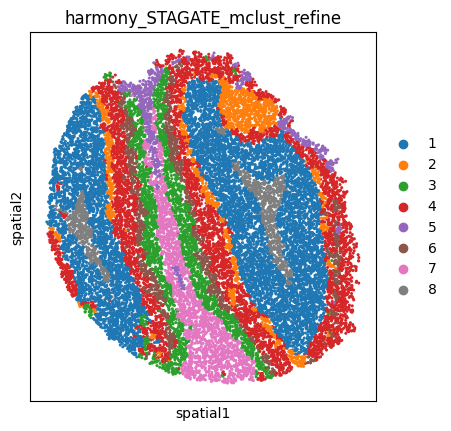

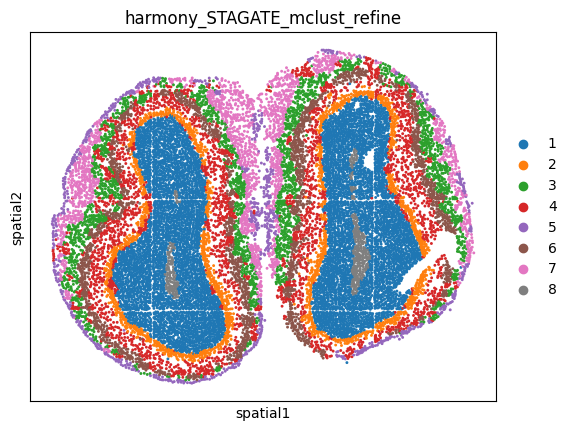

In [35]:
# adata.obs[method+'_'+metric+'_refine']=pd.read_csv(dirs+"metrics/"+method+flags+"_"+metric+"_clust_modify.csv",header=0,index_col=0).loc[adata.obs_names,:]
ub=np.unique(adata.obs['batch'].values)
adata1=adata[adata.obs['batch']==ub[0],:]
adata2=adata[adata.obs['batch']==ub[1],:]
s1=40
s2=40
metric="mclust_refine"
sc.pl.spatial(adata1,color=method+'_'+metric, spot_size=s1)
sc.pl.spatial(adata2,color=method+'_'+metric, spot_size=s2)

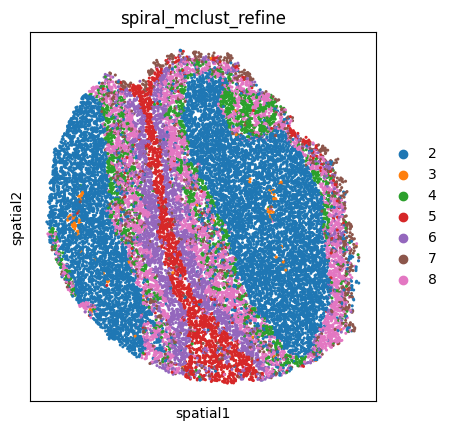

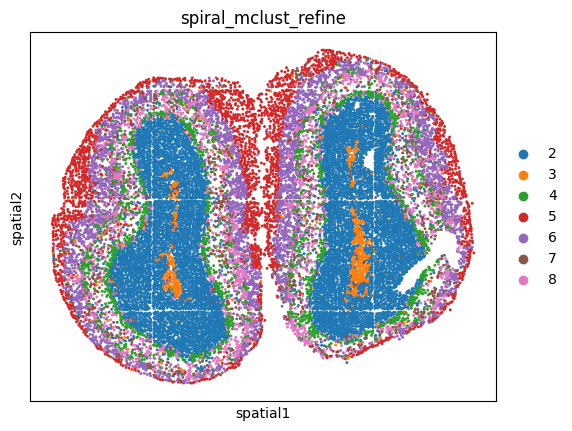

In [36]:
method='spiral'
ub=np.unique(adata.obs['batch'].values)
adata1=adata[adata.obs['batch']==ub[0],:]
adata2=adata[adata.obs['batch']==ub[1],:]
s1=40
s2=40
metric="mclust_refine"
sc.pl.spatial(adata1,color=method+'_'+metric, spot_size=s1)
sc.pl.spatial(adata2,color=method+'_'+metric, spot_size=s2)

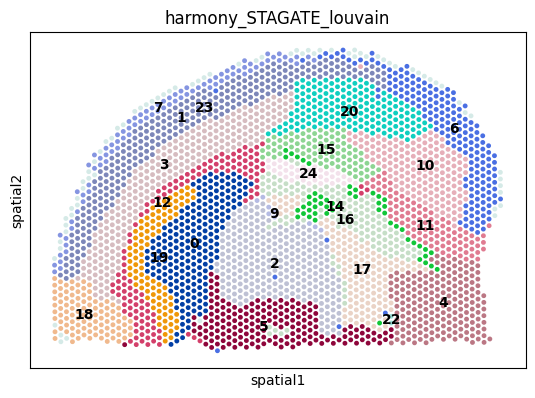

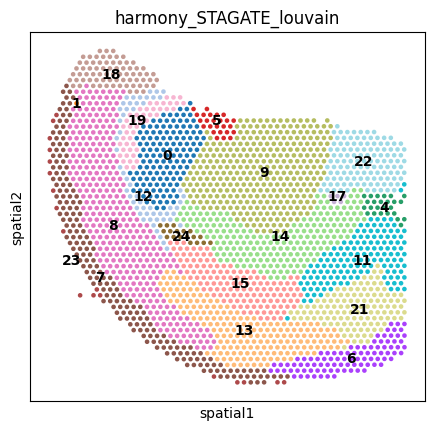

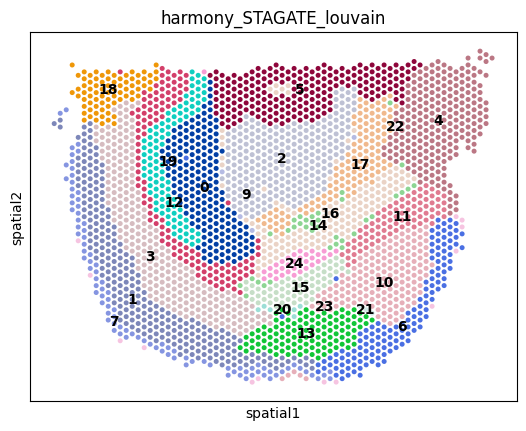

In [8]:
metric='louvain'
ub=np.unique(adata.obs['batch'].values)
adata1=adata[adata.obs['batch']==ub[0],:]
adata2=adata[adata.obs['batch']==ub[1],:]
adata3=adata[adata.obs['batch']==ub[2],:]
# adata4=adata[adata.obs['batch']==ub[3],:]
s1=200
s2=200
s3=100
s4=100
sc.pl.spatial(adata1,color=method+'_'+metric, spot_size=s1,legend_loc='on data')
sc.pl.spatial(adata2,color=method+'_'+metric, spot_size=s2,legend_loc='on data')
sc.pl.spatial(adata3,color=method+'_'+metric, spot_size=s3,legend_loc='on data')
# sc.pl.spatial(adata4,color=methods[k]+'_'+metric, spot_size=s4,legend_loc='on data')

# sc.pl.spatial(adata1,color='BASS', spot_size=s1)
# sc.pl.spatial(adata2,color='BASS', spot_size=s2)
# sc.pl.spatial(adata3,color='BASS', spot_size=s3)
# sc.pl.spatial(adata4,color='BASS', spot_size=s4)

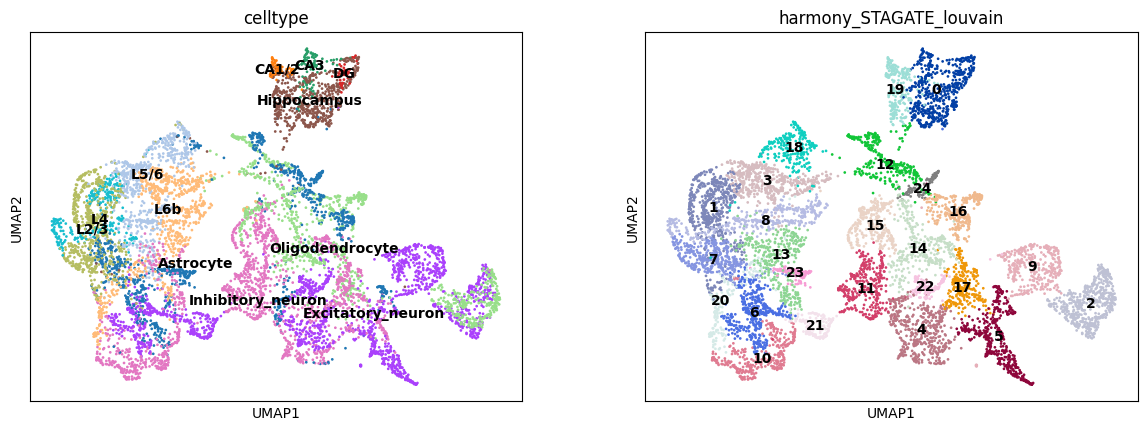

In [81]:
method=methods[2]
metric='louvain'
a=pd.read_csv(dirs+"metrics/"+method+flags+"_"+metric+"_clust_modify.csv",index_col=0,header=0).values[:,0]
a=[str(x) for x in a]
adata.obs[method+'_'+metric]=a
sc.pp.neighbors(adata, use_rep=method)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["celltype",method+"_"+metric], title=["celltype",method+"_"+metric],legend_loc='on data')

In [97]:
method=methods[5]
print(method)
metric='louvain'
idx=np.where((adata.obs['celltype']=='Hippocampus')|(adata.obs['celltype']=='CA1/2')|(adata.obs['celltype']=='CA3')|
             (adata.obs['celltype']=='DG'))[0]
# idx=np.where((adata.obs[method+'_'+metric]=='10')|(adata.obs[method+'_'+metric]=='15')|(adata.obs[method+'_'+metric]=='20'))[0]
# idx=np.where((adata.obs[method+'_'+metric]=='0')|(adata.obs[method+'_'+metric]=='19'))[0]
# idx=np.where((adata.obs[method+'_'+metric]=='8')|(adata.obs[method+'_'+metric]=='20'))[0]
# idx=np.where((adata.obs[method+'_'+metric]=='0')|(adata.obs[method+'_'+metric]=='21'))[0]
adata_hippo=adata[idx,]
sc.pp.neighbors(adata_hippo, use_rep=method)
sc.tl.louvain(adata_hippo,resolution=0.3)
adata_hippo.obs[method+'_'+metric]=adata_hippo.obs[metric]
adata_hippo.obs[method+'_'+metric].to_csv(dirs+"metrics/"+method+flags+"_hippo_"+metric+"_clust_modify.csv")

DeepST


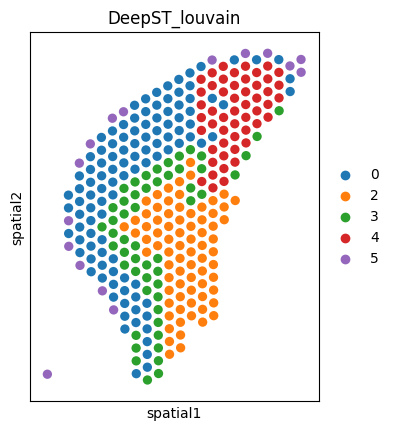

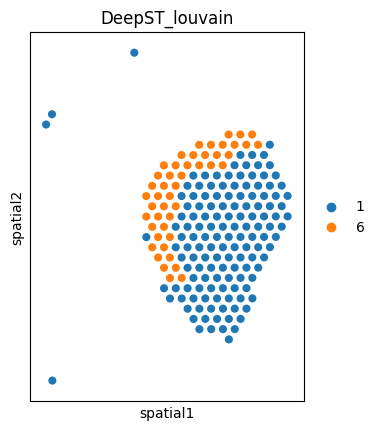

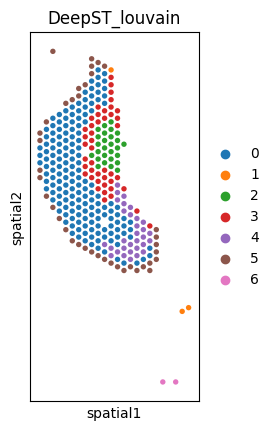

In [98]:
adata1=adata_hippo[adata_hippo.obs['batch']==ub[0],:]
adata2=adata_hippo[adata_hippo.obs['batch']==ub[1],:]
adata3=adata_hippo[adata_hippo.obs['batch']==ub[2],:]
# adata4=adata[adata.obs['batch']==ub[3],:]
s1=200
s2=200
s3=100
s4=100
sc.pl.spatial(adata1,color=method+'_'+metric, spot_size=s1)
sc.pl.spatial(adata2,color=method+'_'+metric, spot_size=s2)
sc.pl.spatial(adata3,color=method+'_'+metric, spot_size=s3)

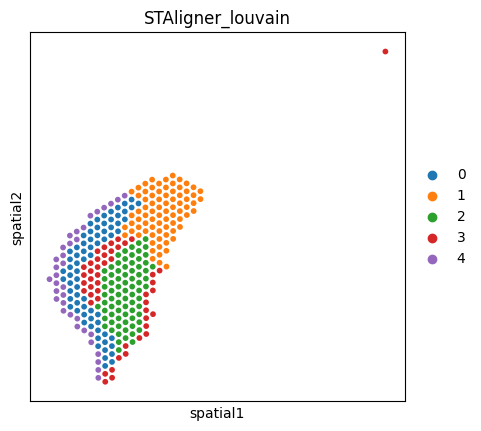

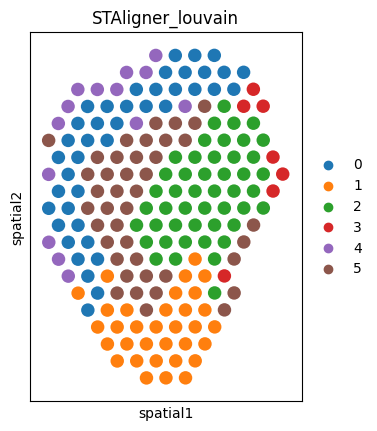

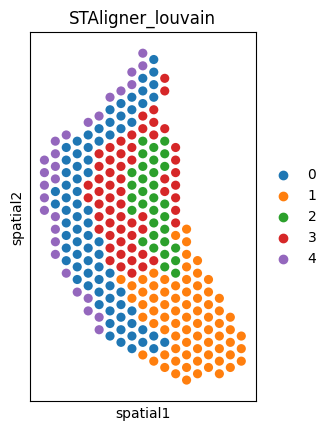

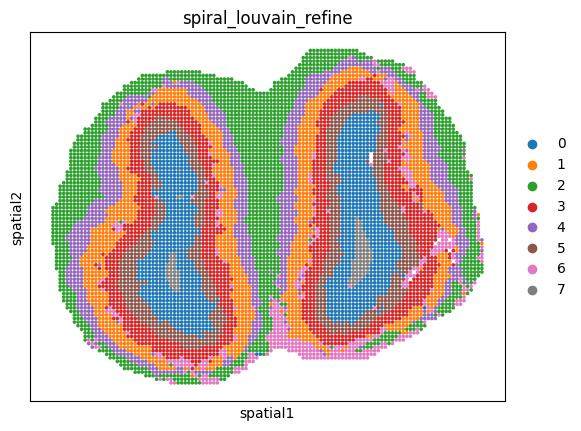

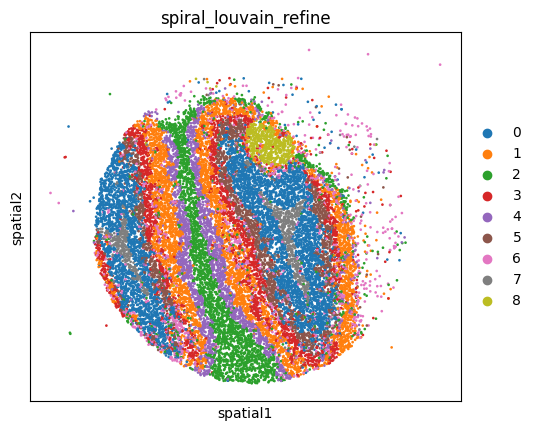

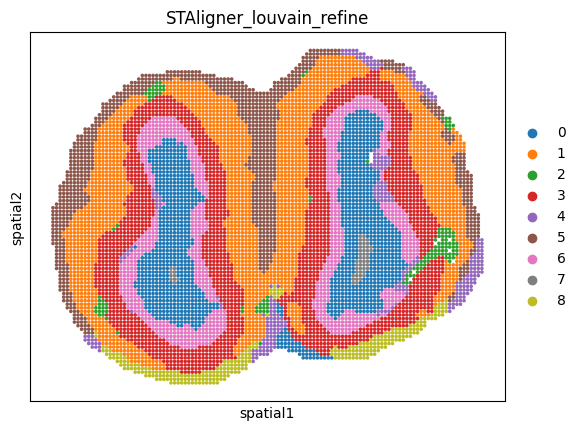

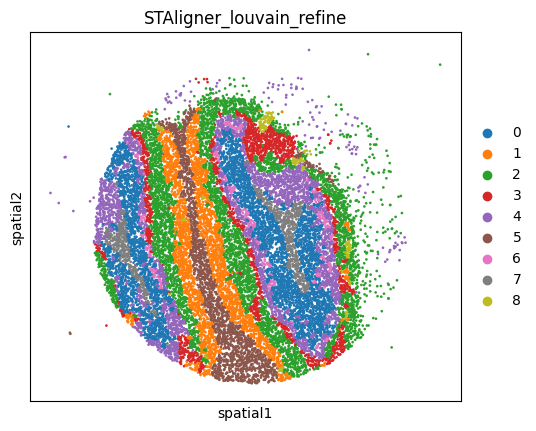

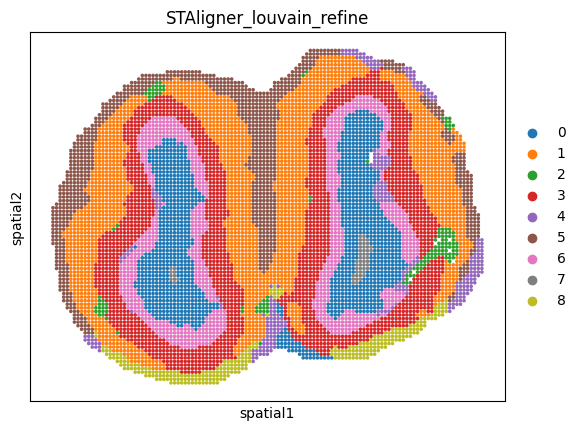

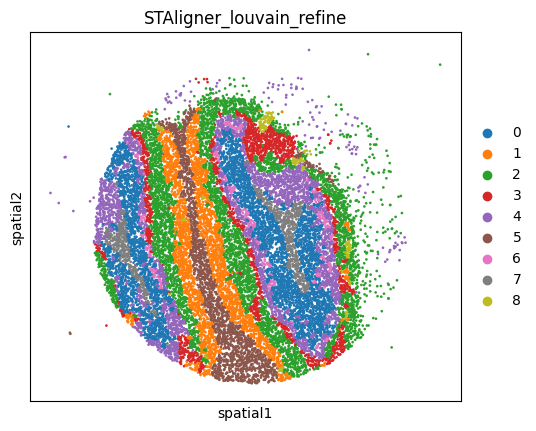

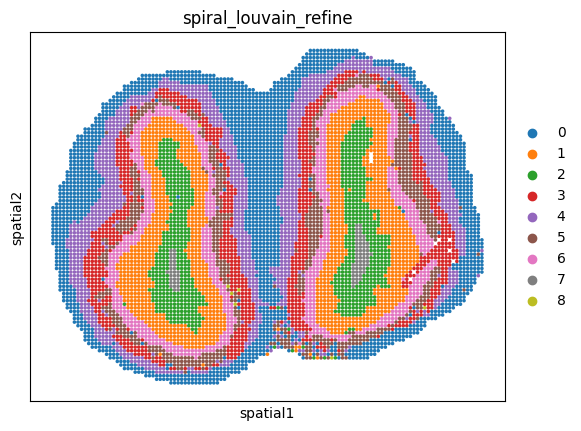

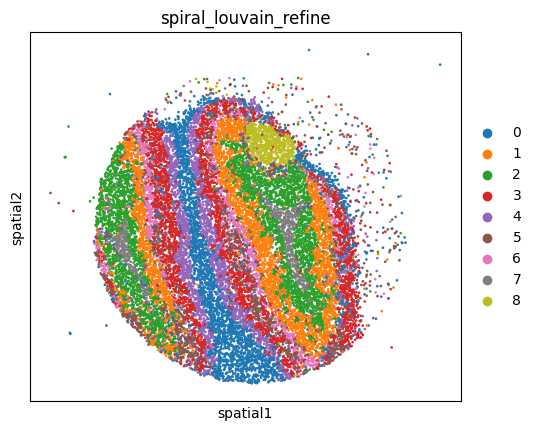

In [168]:
# ub=np.unique(adata.obs['batch'].values)
# adata1=adata[adata.obs['batch']==ub[0],:]
# adata2=adata[adata.obs['batch']==ub[1],:]
k=6
s1=1
s2=40
metric="louvain_refine"
# sc.pl.spatial(adata1,color="celltype", spot_size=s1)
sc.pl.spatial(adata1,color=methods[k]+'_'+metric, spot_size=s1)
# sc.pl.spatial(adata2,color="celltype", spot_size=s2)
sc.pl.spatial(adata2,color=methods[k]+'_'+metric, spot_size=s2)

k=0
s1=1
s2=40
metric="louvain_refine"
# sc.pl.spatial(adata1,color="celltype", spot_size=s1)
sc.pl.spatial(adata1,color=methods[k]+'_'+metric, spot_size=s1)
# sc.pl.spatial(adata2,color="celltype", spot_size=s2)
sc.pl.spatial(adata2,color=methods[k]+'_'+metric, spot_size=s2)

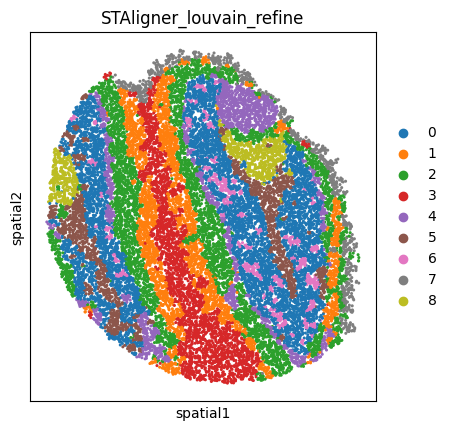

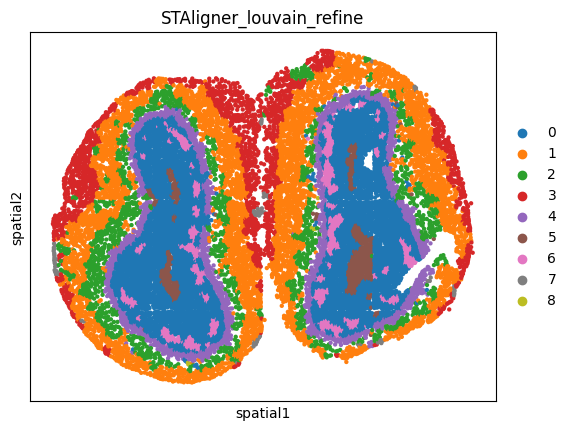

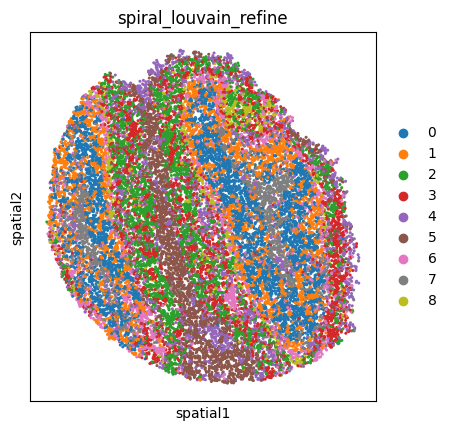

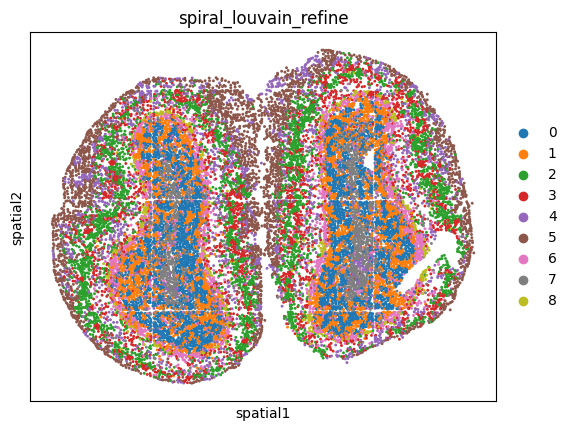